In [2]:
!pip install tensorflow
!pip install keras


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Function to create model
def create_model(lstm_units=3):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(timesteps, features), 
                   recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))  # L2 regularization
    model.add(Dropout(0.4))  # Increased dropout rate
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Load the data (assuming the data loading code provided above)
train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']  # Load features
train_feat_Y = train_feat['label']  # Load labels

valid_feat = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']  # Load validation features
valid_feat_Y = valid_feat['label']  # Load validation labels

# Prepare features and labels for training
X = train_feat_X
y = train_feat_Y

# LSTM expects a 3D input: (batch_size, timesteps, features)
timesteps = X.shape[1]  # Assuming second dimension is the sequence length
features = X.shape[2] 


In [5]:
# # Character-level tokenizer for emoticons
# tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
# tokenizer.fit_on_texts(train_emoticon_X)

# # Convert emoticons into sequences of integers for both train and validation sets
# train_sequences = tokenizer.texts_to_sequences(train_emoticon_X)
# valid_sequences = tokenizer.texts_to_sequences(valid_emoticon_X)

# # Padding to ensure all sequences are of the same length for both train and validation sets
# max_len = max(len(seq) for seq in train_sequences)  # Ensuring max_len is consistent for both sets
# train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
# valid_padded = pad_sequences(valid_sequences, maxlen=max_len, padding='post')

In [6]:
# # One-hot encode the integer sequences (each token becomes a one-hot vector)
# vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because Keras indexing starts from 1
# train_one_hot = tf.keras.utils.to_categorical(train_padded, num_classes=vocab_size)
# valid_one_hot = tf.keras.utils.to_categorical(valid_padded, num_classes=vocab_size)

In [7]:
# # Encode the labels for both train and validation sets
# label_encoder = LabelEncoder()
# train_encoded = label_encoder.fit_transform(train_emoticon_Y)
# valid_encoded = label_encoder.transform(valid_emoticon_Y)



Training with: LSTM Units=3, Batch Size=32, LR=0.001, Epochs=10


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5580 - loss: 0.7700 - val_accuracy: 0.8303 - val_loss: 0.5334
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8005 - loss: 0.5340 - val_accuracy: 0.9489 - val_loss: 0.3671
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8241 - loss: 0.4553 - val_accuracy: 0.9407 - val_loss: 0.3313
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8369 - loss: 0.4205 - val_accuracy: 0.9611 - val_loss: 0.2864
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8450 - loss: 0.4015 - val_accuracy: 0.9530 - val_loss: 0.2742
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8528 - loss: 0.3802 - val_accuracy: 0.9611 - val_loss: 0.2484
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8432 - loss: 0.3838 - val_accuracy: 0.9693 - val_loss: 0.2367
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8510 - loss: 0.3651 - val_accuracy: 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5595 - loss: 0.7639 - val_accuracy: 0.8589 - val_loss: 0.5670
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7838 - loss: 0.5607 - val_accuracy: 0.8691 - val_loss: 0.4277
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8182 - loss: 0.4748 - val_accuracy: 0.9223 - val_loss: 0.3602
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8308 - loss: 0.4342 - val_accuracy: 0.9509 - val_loss: 0.3074
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8468 - loss: 0.4045 - val_accuracy: 0.9489 - val_loss: 0.2973
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8504 - loss: 0.3833 - val_accuracy: 0.9611 - val_loss: 0.2673
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8458 - loss: 0.3757 - val_accuracy: 0.9530 - val_loss: 0.2395
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8524 - loss: 0.3571 - val_accuracy:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6643 - loss: 0.7326 - val_accuracy: 0.9141 - val_loss: 0.4346
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8359 - loss: 0.4687 - val_accuracy: 0.9489 - val_loss: 0.3091
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8608 - loss: 0.4040 - val_accuracy: 0.9673 - val_loss: 0.2693
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8696 - loss: 0.3767 - val_accuracy: 0.9509 - val_loss: 0.2469
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8791 - loss: 0.3572 - val_accuracy: 0.9509 - val_loss: 0.2343
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8784 - loss: 0.3583 - val_accuracy: 0.9243 - val_loss: 0.2414
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8857 - loss: 0.3375 - val_accuracy: 0.9243 - val_loss: 0.2403
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8946 - loss: 0.3119 - val_accurac

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7092 - loss: 0.6442 - val_accuracy: 0.9346 - val_loss: 0.3262
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8579 - loss: 0.4052 - val_accuracy: 0.9325 - val_loss: 0.2459
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8480 - loss: 0.3996 - val_accuracy: 0.9509 - val_loss: 0.2426
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8673 - loss: 0.3631 - val_accuracy: 0.9182 - val_loss: 0.2480
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8646 - loss: 0.3646 - val_accuracy: 0.9775 - val_loss: 0.1887
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8824 - loss: 0.3351 - val_accuracy: 0.9530 - val_loss: 0.2453
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8819 - loss: 0.3273 - val_accuracy: 0.9121 - val_loss: 0.2290
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8803 - loss: 0.3276 - val_accuracy: 0

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6129 - loss: 0.6877 - val_accuracy: 0.7546 - val_loss: 0.5671
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7293 - loss: 0.5532 - val_accuracy: 0.9284 - val_loss: 0.3236
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8236 - loss: 0.4478 - val_accuracy: 0.9652 - val_loss: 0.2624
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8645 - loss: 0.3824 - val_accuracy: 0.9468 - val_loss: 0.2445
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8684 - loss: 0.3601 - val_accuracy: 0.9611 - val_loss: 0.2136
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8747 - loss: 0.3529 - val_accuracy: 0.9407 - val_loss: 0.2243
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8783 - loss: 0.3351 - val_accuracy: 0.9039 - val_loss: 0.2598
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8791 - loss: 0.3313 - val_accuracy: 0

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6337 - loss: 0.6924 - val_accuracy: 0.9121 - val_loss: 0.3894
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8048 - loss: 0.4796 - val_accuracy: 0.9550 - val_loss: 0.2843
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8559 - loss: 0.4091 - val_accuracy: 0.9489 - val_loss: 0.2461
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8595 - loss: 0.3810 - val_accuracy: 0.9489 - val_loss: 0.2225
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8734 - loss: 0.3555 - val_accuracy: 0.9427 - val_loss: 0.2249
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8720 - loss: 0.3565 - val_accuracy: 0.9673 - val_loss: 0.1866
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8734 - loss: 0.3534 - val_accuracy: 0.9387 - val_loss: 0.2514
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8884 - loss: 0.3253 - val_accuracy

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6622 - loss: 0.6620 - val_accuracy: 0.8569 - val_loss: 0.4004
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8308 - loss: 0.4511 - val_accuracy: 0.9305 - val_loss: 0.2898
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8259 - loss: 0.4417 - val_accuracy: 0.8937 - val_loss: 0.3809
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8446 - loss: 0.4120 - val_accuracy: 0.9366 - val_loss: 0.2363
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8575 - loss: 0.3950 - val_accuracy: 0.9346 - val_loss: 0.2487
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8613 - loss: 0.3742 - val_accuracy: 0.8998 - val_loss: 0.2964
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8577 - loss: 0.3853 - val_accuracy: 0.9141 - val_loss: 0.2665
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8670 - loss: 0.3567 - val_accuracy: 

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6574 - loss: 0.6730 - val_accuracy: 0.7526 - val_loss: 0.5397
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7138 - loss: 0.5909 - val_accuracy: 0.7587 - val_loss: 0.5674
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7161 - loss: 0.5865 - val_accuracy: 0.7403 - val_loss: 0.5326
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7148 - loss: 0.5962 - val_accuracy: 0.7546 - val_loss: 0.5285
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7238 - loss: 0.5870 - val_accuracy: 0.7403 - val_loss: 0.5503
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7207 - loss: 0.5817 - val_accuracy: 0.7117 - val_loss: 0.5731
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7180 - loss: 0.5862 - val_accuracy: 0.7464 - val_loss: 0.5425
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7245 - loss: 0.5724 - val_accuracy: 0

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7180 - loss: 0.6367 - val_accuracy: 0.9305 - val_loss: 0.3042
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8503 - loss: 0.4249 - val_accuracy: 0.9489 - val_loss: 0.2456
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8568 - loss: 0.4023 - val_accuracy: 0.9284 - val_loss: 0.2867
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8619 - loss: 0.3747 - val_accuracy: 0.9468 - val_loss: 0.2267
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8635 - loss: 0.3895 - val_accuracy: 0.9121 - val_loss: 0.2597
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8601 - loss: 0.3774 - val_accuracy: 0.9591 - val_loss: 0.2244
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8721 - loss: 0.3668 - val_accuracy: 0.9468 - val_loss: 0.2182
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8804 - loss: 0.3547 - val_accuracy: 0

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6328 - loss: 0.7727 - val_accuracy: 0.9162 - val_loss: 0.4126
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8254 - loss: 0.4935 - val_accuracy: 0.9284 - val_loss: 0.3642
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8396 - loss: 0.4513 - val_accuracy: 0.9489 - val_loss: 0.3016
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8480 - loss: 0.4277 - val_accuracy: 0.9448 - val_loss: 0.2867
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8524 - loss: 0.4090 - val_accuracy: 0.9366 - val_loss: 0.2778
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8643 - loss: 0.3889 - val_accuracy: 0.9530 - val_loss: 0.2524
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8759 - loss: 0.3579 - val_accuracy: 0.9509 - val_loss: 0.2355
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8852 - loss: 0.3425 - val_accuracy:

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6161 - loss: 0.7793 - val_accuracy: 0.8671 - val_loss: 0.5064
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8007 - loss: 0.5477 - val_accuracy: 0.9121 - val_loss: 0.4027
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8432 - loss: 0.4661 - val_accuracy: 0.9407 - val_loss: 0.3416
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8428 - loss: 0.4400 - val_accuracy: 0.9366 - val_loss: 0.3220
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8553 - loss: 0.4118 - val_accuracy: 0.9387 - val_loss: 0.2869
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8602 - loss: 0.3842 - val_accuracy: 0.9387 - val_loss: 0.2735
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8694 - loss: 0.3683 - val_accuracy: 0.9509 - val_loss: 0.2536
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8743 - loss: 0.3566 - val_accuracy: 

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6212 - loss: 0.7894 - val_accuracy: 0.7710 - val_loss: 0.5742
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7782 - loss: 0.5546 - val_accuracy: 0.9121 - val_loss: 0.3893
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8350 - loss: 0.4657 - val_accuracy: 0.9489 - val_loss: 0.3197
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8664 - loss: 0.4047 - val_accuracy: 0.9264 - val_loss: 0.3007
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8791 - loss: 0.3799 - val_accuracy: 0.9550 - val_loss: 0.2594
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8815 - loss: 0.3636 - val_accuracy: 0.9632 - val_loss: 0.2547
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8855 - loss: 0.3450 - val_accuracy: 0.9734 - val_loss: 0.2261
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8824 - loss: 0.3457 - val_accu

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6527 - loss: 0.6868 - val_accuracy: 0.9489 - val_loss: 0.3356
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8377 - loss: 0.4321 - val_accuracy: 0.9468 - val_loss: 0.2684
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8363 - loss: 0.4032 - val_accuracy: 0.9755 - val_loss: 0.2312
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8346 - loss: 0.3838 - val_accuracy: 0.9734 - val_loss: 0.2174
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8475 - loss: 0.3722 - val_accuracy: 0.9632 - val_loss: 0.1952
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8576 - loss: 0.3466 - val_accuracy: 0.9530 - val_loss: 0.2204
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8537 - loss: 0.3647 - val_accuracy: 0.9734 - val_loss: 0.1913
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8571 - loss: 0.3455 - val_accuracy

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6309 - loss: 0.7148 - val_accuracy: 0.9468 - val_loss: 0.3989
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8384 - loss: 0.4755 - val_accuracy: 0.9693 - val_loss: 0.2963
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8492 - loss: 0.4129 - val_accuracy: 0.9223 - val_loss: 0.2944
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8590 - loss: 0.3878 - val_accuracy: 0.9468 - val_loss: 0.2382
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8811 - loss: 0.3406 - val_accuracy: 0.9530 - val_loss: 0.2185
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8721 - loss: 0.3571 - val_accuracy: 0.9632 - val_loss: 0.1959
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8820 - loss: 0.3265 - val_accuracy: 0.9693 - val_loss: 0.1853
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8774 - loss: 0.3367 - val_accuracy: 0

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6862 - loss: 0.6729 - val_accuracy: 0.9162 - val_loss: 0.3623
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8253 - loss: 0.4585 - val_accuracy: 0.9223 - val_loss: 0.3115
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8338 - loss: 0.4117 - val_accuracy: 0.9284 - val_loss: 0.2774
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8432 - loss: 0.3853 - val_accuracy: 0.9652 - val_loss: 0.2260
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8492 - loss: 0.3671 - val_accuracy: 0.9693 - val_loss: 0.2188
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8568 - loss: 0.3607 - val_accuracy: 0.9509 - val_loss: 0.2187
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8607 - loss: 0.3605 - val_accuracy: 0.9693 - val_loss: 0.2026
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8590 - loss: 0.3663 - val_accuracy:

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6577 - loss: 0.6778 - val_accuracy: 0.9121 - val_loss: 0.3738
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8540 - loss: 0.4348 - val_accuracy: 0.9571 - val_loss: 0.2443
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8605 - loss: 0.3874 - val_accuracy: 0.9652 - val_loss: 0.2328
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8578 - loss: 0.3937 - val_accuracy: 0.9080 - val_loss: 0.2515
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8743 - loss: 0.3631 - val_accuracy: 0.9284 - val_loss: 0.2522
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8516 - loss: 0.3904 - val_accuracy: 0.9571 - val_loss: 0.2297
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8759 - loss: 0.3395 - val_accuracy: 0.9755 - val_loss: 0.1850
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8730 - loss: 0.3507 - val_acc

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6928 - loss: 0.6544 - val_accuracy: 0.8814 - val_loss: 0.3686
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8381 - loss: 0.4485 - val_accuracy: 0.9325 - val_loss: 0.3080
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8487 - loss: 0.4014 - val_accuracy: 0.9325 - val_loss: 0.2634
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8466 - loss: 0.4140 - val_accuracy: 0.9550 - val_loss: 0.2359
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8554 - loss: 0.3935 - val_accuracy: 0.9734 - val_loss: 0.2163
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8551 - loss: 0.3888 - val_accuracy: 0.8855 - val_loss: 0.3335
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8812 - loss: 0.3402 - val_accuracy: 0.9652 - val_loss: 0.2002
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8668 - loss: 0.3658 - val_accuracy: 0

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6873 - loss: 0.6687 - val_accuracy: 0.9223 - val_loss: 0.3657
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8288 - loss: 0.4394 - val_accuracy: 0.9530 - val_loss: 0.2643
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8541 - loss: 0.4054 - val_accuracy: 0.9693 - val_loss: 0.2418
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8608 - loss: 0.3841 - val_accuracy: 0.9427 - val_loss: 0.2291
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8677 - loss: 0.3756 - val_accuracy: 0.9509 - val_loss: 0.2266
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8550 - loss: 0.3880 - val_accuracy: 0.9387 - val_loss: 0.2465
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8701 - loss: 0.3631 - val_accuracy: 0.9202 - val_loss: 0.2460
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8698 - loss: 0.3529 - val_accuracy: 0.

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6232 - loss: 0.7870 - val_accuracy: 0.7648 - val_loss: 0.5601
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7515 - loss: 0.5803 - val_accuracy: 0.8998 - val_loss: 0.4195
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8203 - loss: 0.4891 - val_accuracy: 0.9530 - val_loss: 0.3395
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8507 - loss: 0.4317 - val_accuracy: 0.9366 - val_loss: 0.3151
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8675 - loss: 0.4008 - val_accuracy: 0.9652 - val_loss: 0.2690
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8800 - loss: 0.3707 - val_accuracy: 0.9693 - val_loss: 0.2544
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8836 - loss: 0.3523 - val_accuracy: 0.9284 - val_loss: 0.2629
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8722 - loss: 0.3659 - val_accuracy: 0

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6389 - loss: 0.7860 - val_accuracy: 0.9121 - val_loss: 0.4577
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8358 - loss: 0.4990 - val_accuracy: 0.9448 - val_loss: 0.3777
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8548 - loss: 0.4457 - val_accuracy: 0.9530 - val_loss: 0.3367
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8695 - loss: 0.4115 - val_accuracy: 0.9448 - val_loss: 0.3079
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8906 - loss: 0.3689 - val_accuracy: 0.9427 - val_loss: 0.2918
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8842 - loss: 0.3690 - val_accuracy: 0.9632 - val_loss: 0.2709
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8764 - loss: 0.3642 - val_accuracy: 0.9489 - val_loss: 0.2651
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8732 - loss: 0.3539 - val_accuracy: 0

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5968 - loss: 0.7978 - val_accuracy: 0.7566 - val_loss: 0.6150
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6967 - loss: 0.6318 - val_accuracy: 0.8139 - val_loss: 0.5430
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7858 - loss: 0.5532 - val_accuracy: 0.9387 - val_loss: 0.4082
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8125 - loss: 0.4853 - val_accuracy: 0.9182 - val_loss: 0.3722
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8324 - loss: 0.4554 - val_accuracy: 0.9693 - val_loss: 0.3073
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8497 - loss: 0.4271 - val_accuracy: 0.9264 - val_loss: 0.3034
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8678 - loss: 0.3878 - val_accuracy: 0.9714 - val_loss: 0.2586
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8820 - loss: 0.3559 - val_accuracy: 0.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6295 - loss: 0.7302 - val_accuracy: 0.7505 - val_loss: 0.5685
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7624 - loss: 0.5536 - val_accuracy: 0.9182 - val_loss: 0.3486
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8324 - loss: 0.4303 - val_accuracy: 0.9243 - val_loss: 0.2939
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8638 - loss: 0.3734 - val_accuracy: 0.9387 - val_loss: 0.2647
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8670 - loss: 0.3555 - val_accuracy: 0.9387 - val_loss: 0.2286
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8752 - loss: 0.3375 - val_accuracy: 0.9468 - val_loss: 0.2150
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8765 - loss: 0.3327 - val_accuracy: 0.9468 - val_loss: 0.2208
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8775 - loss: 0.3311 - val_accuracy: 0.

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6698 - loss: 0.7034 - val_accuracy: 0.9305 - val_loss: 0.3747
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8489 - loss: 0.4397 - val_accuracy: 0.9693 - val_loss: 0.2787
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8705 - loss: 0.3783 - val_accuracy: 0.9571 - val_loss: 0.2438
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8565 - loss: 0.3756 - val_accuracy: 0.9427 - val_loss: 0.2348
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8752 - loss: 0.3440 - val_accuracy: 0.9223 - val_loss: 0.2417
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8826 - loss: 0.3328 - val_accuracy: 0.9693 - val_loss: 0.1977
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8898 - loss: 0.3264 - val_accuracy: 0.9693 - val_loss: 0.1967
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8875 - loss: 0.3143 - val_accuracy: 0

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6914 - loss: 0.6871 - val_accuracy: 0.9141 - val_loss: 0.3589
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8297 - loss: 0.4649 - val_accuracy: 0.9468 - val_loss: 0.2871
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8462 - loss: 0.4055 - val_accuracy: 0.9489 - val_loss: 0.2585
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8580 - loss: 0.3745 - val_accuracy: 0.9530 - val_loss: 0.2369
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8721 - loss: 0.3646 - val_accuracy: 0.9571 - val_loss: 0.2151
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8809 - loss: 0.3397 - val_accuracy: 0.9734 - val_loss: 0.1968
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8781 - loss: 0.3427 - val_accuracy: 0.9468 - val_loss: 0.2104
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8773 - loss: 0.3395 - val_accuracy: 0

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6266 - loss: 0.7121 - val_accuracy: 0.9427 - val_loss: 0.4024
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8257 - loss: 0.4692 - val_accuracy: 0.9407 - val_loss: 0.2910
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8278 - loss: 0.4281 - val_accuracy: 0.9366 - val_loss: 0.2557
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8453 - loss: 0.3898 - val_accuracy: 0.8732 - val_loss: 0.3426
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8504 - loss: 0.3837 - val_accuracy: 0.9387 - val_loss: 0.2151
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8524 - loss: 0.3735 - val_accuracy: 0.9202 - val_loss: 0.2589
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8611 - loss: 0.3479 - val_accuracy: 0.9427 - val_loss: 0.2169
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8613 - loss: 0.3515 - val_accuracy: 0

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6981 - loss: 0.6662 - val_accuracy: 0.9284 - val_loss: 0.3695
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8069 - loss: 0.4803 - val_accuracy: 0.9141 - val_loss: 0.3243
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8408 - loss: 0.4090 - val_accuracy: 0.9468 - val_loss: 0.2486
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8383 - loss: 0.4040 - val_accuracy: 0.9550 - val_loss: 0.2174
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8479 - loss: 0.3841 - val_accuracy: 0.9305 - val_loss: 0.2419
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8575 - loss: 0.3713 - val_accuracy: 0.9427 - val_loss: 0.2360
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8474 - loss: 0.3710 - val_accuracy: 0.9489 - val_loss: 0.2058
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8536 - loss: 0.3678 - val_accuracy: 0

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 3)              │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,272 (36.22 KB)

 Trainable params: 9,272 (36.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6439 - loss: 0.6948 - val_accuracy: 0.9346 - val_loss: 0.3599
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8133 - loss: 0.4596 - val_accuracy: 0.9162 - val_loss: 0.2923
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8157 - loss: 0.4236 - val_accuracy: 0.9346 - val_loss: 0.2950
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8241 - loss: 0.4079 - val_accuracy: 0.9448 - val_loss: 0.2483
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8263 - loss: 0.3946 - val_accuracy: 0.9550 - val_loss: 0.2259
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8325 - loss: 0.3714 - val_accuracy: 0.9202 - val_loss: 0.2731
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8458 - loss: 0.4002 - val_accuracy: 0.9305 - val_loss: 0.2464
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8402 - loss: 0.3900 - val_accuracy: 0

C:\Users\DELL\AppData\Local\Temp\ipykernel_17804\1557462164.py:123: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


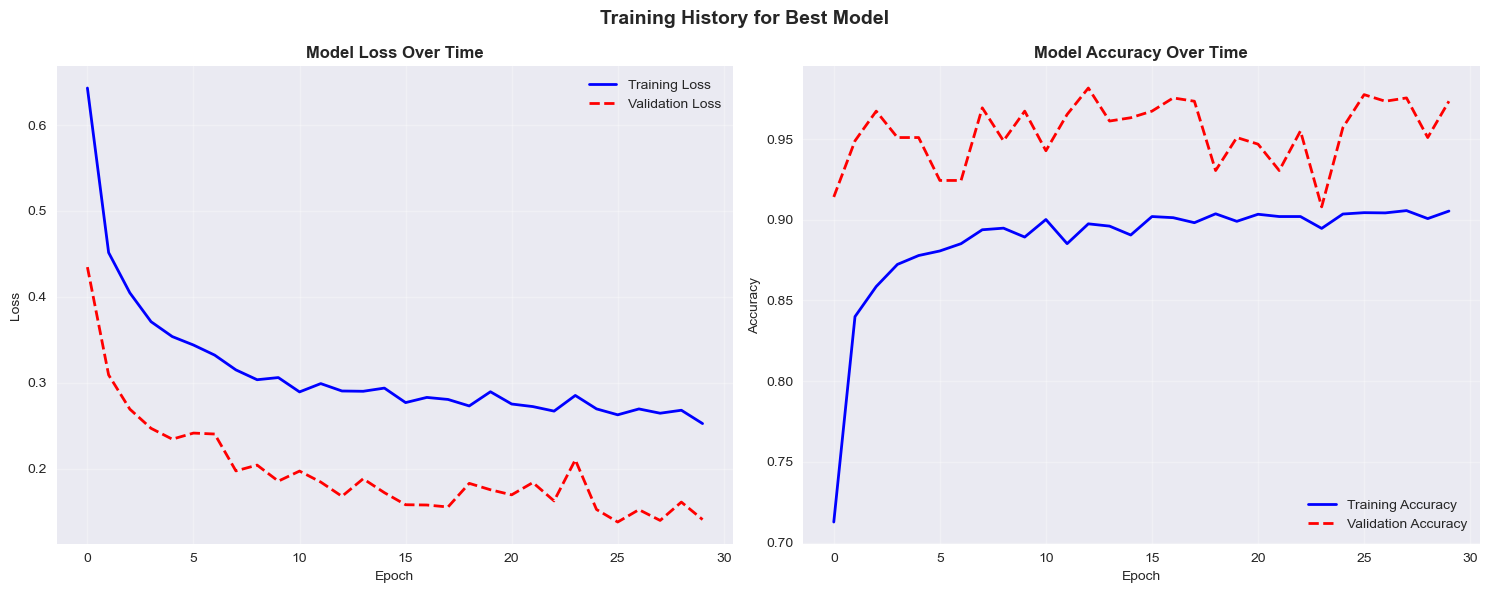


Best model saved as 'best_lstm_model.keras'


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import itertools
import matplotlib.pyplot as plt

# Load the data
train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

valid_feat = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']

# Get dimensions for LSTM input
timesteps = train_feat_X.shape[1]
features = train_feat_X.shape[2]
num_classes = len(np.unique(train_feat_Y))

# Define hyperparameter grid
lstm_units_options = [3, 4]
batch_size_options = [32, 50, 64]
learning_rate_options = [0.001, 0.003, 0.005]
epochs_options = [10, 20, 30]

# Create all combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(
    lstm_units_options, 
    batch_size_options, 
    learning_rate_options, 
    epochs_options
))

# Define early stopping with improved parameters
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    mode='min',
    restore_best_weights=True,
    verbose=1
)

# Initialize variables for best results
best_val_accuracy = 0
best_params = None
best_history = None

# Loop through hyperparameter combinations
for (lstm_units, batch_size, learning_rate, epochs) in hyperparameter_combinations:
    print(f"\nTraining with: LSTM Units={lstm_units}, Batch Size={batch_size}, "
          f"LR={learning_rate}, Epochs={epochs}")
    
    # Build model
    model = Sequential()
    model.add(LSTM(
        lstm_units,
        input_shape=(timesteps, features),
        recurrent_dropout=0.2,
        kernel_regularizer=l2(0.01)
    ))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    # Check parameter count
    model_params = model.count_params()
    if model_params > 10000:
        print(f"Skipping combination (Trainable Params: {model_params})\n")
        continue
    
    # Print model summary
    model.summary()
    
    # Train model
    history = model.fit(
        train_feat_X,
        train_feat_Y,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(valid_feat_X, valid_feat_Y),
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Get best validation accuracy
    best_epoch_val_accuracy = max(history.history['val_accuracy'])
    
    # Update best parameters if necessary
    if best_epoch_val_accuracy > best_val_accuracy:
        best_val_accuracy = best_epoch_val_accuracy
        best_history = history
        best_params = {
            'lstm_units': lstm_units,
            'batch_size': batch_size,
            'learning_rate': learning_rate,
            'epochs': len(history.history['loss']),
            'stopped_epoch': early_stopping.stopped_epoch
        }

# Print final results
print("\nTraining Results:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")
print("Best Hyperparameters:")
print(f"LSTM Units: {best_params['lstm_units']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Actual Epochs Trained: {best_params['epochs']}")
print(f"Stopped at Epoch: {best_params['stopped_epoch']}")

# Plot training history
plt.style.use('seaborn')
plt.figure(figsize=(15, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.plot(best_history.history['val_loss'], 'r--', label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
plt.plot(best_history.history['val_accuracy'], 'r--', label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.suptitle('Training History for Best Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Save the best model
model.save('best_lstm_model.keras')
print("\nBest model saved as 'best_lstm_model.keras'")


Training with 20.0% of training data


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.5858 - loss: 0.6736 - val_accuracy: 0.7566 - val_loss: 0.5772 - learning_rate: 0.0010
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7149 - loss: 0.5678 - val_accuracy: 0.7710 - val_loss: 0.5013 - learning_rate: 0.0010
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7670 - loss: 0.5208 - val_accuracy: 0.8344 - val_loss: 0.4198 - learning_rate: 0.0010
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8002 - loss: 0.4558 - val_accuracy: 0.8814 - val_loss: 0.3423 - learning_rate: 0.0010
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8258 - loss: 0.4112 - val_accuracy: 0.8916 - val_loss: 0.2995 - learning_rate: 0.0010
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8381 - loss: 0.3681 - val_accuracy: 0.8753 - val_loss: 0.3013 - learning_rate: 0.0010
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8622 - loss: 0.3351 - val_acc

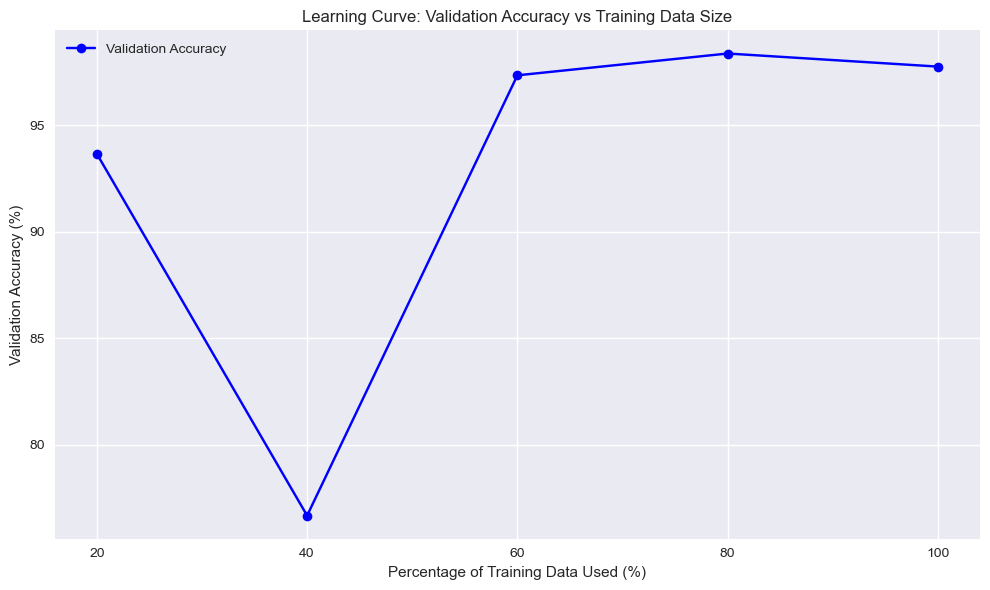


Summary of Results:
Percentage  |  Training Samples  |  Validation Accuracy  |  Validation Loss
----------------------------------------------------------------------
     20.0% |              1416 |             93.66% |          0.1622
     40.0% |              2832 |             76.69% |          0.4866
     60.0% |              4248 |             97.34% |          0.0693
     80.0% |              5664 |             98.36% |          0.0656
    100.0% |              7080 |             97.75% |          0.0685

Results saved to 'training_results.json'


In [9]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load training and validation data
train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

valid_feat = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']

# Define the percentages of training data to use
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
results = {
    'percentages': [],
    'train_samples': [],
    'val_accuracy': [],
    'val_loss': []
}

# Function to create and compile model with best parameters
def create_model(input_shape, num_classes, lstm_units, learning_rate):
    model = Sequential()
    model.add(LSTM(
        lstm_units,
        input_shape=input_shape,
        return_sequences=False,
        recurrent_dropout=0.2
    ))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

# Train model with different percentages of data
for percentage in train_percentages:
    print(f"\nTraining with {percentage*100}% of training data")
    
    # Calculate number of training samples to use
    n_train_samples = int(len(train_feat_X) * percentage)
    
    # Get the subset of training data
    X_train_subset = train_feat_X[:n_train_samples]
    y_train_subset = train_feat_Y[:n_train_samples]
    
    # Create and compile model
    model = create_model(
        input_shape=(train_feat_X.shape[1], train_feat_X.shape[2]),
        num_classes=len(np.unique(train_feat_Y)),  # Assuming labels are encoded
        lstm_units=best_params['lstm_units'],
        learning_rate=best_params['learning_rate']
    )
    
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        min_delta=0.001,
        mode='min',
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
    
    # Train the model
    history = model.fit(
        X_train_subset,
        y_train_subset,
        batch_size=best_params['batch_size'],
        epochs=best_params['epochs'],
        validation_data=(valid_feat_X, valid_feat_Y),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Evaluate on validation set
    val_loss, val_accuracy = model.evaluate(
        valid_feat_X,
        valid_feat_Y,
        verbose=0
    )
    
    # Store results
    results['percentages'].append(percentage * 100)
    results['train_samples'].append(n_train_samples)
    results['val_accuracy'].append(val_accuracy)
    results['val_loss'].append(val_loss)
    
    print(f"\nResults for {percentage*100}% of training data:")
    print(f"Number of training samples: {n_train_samples}")
    print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(results['percentages'], 
         [acc * 100 for acc in results['val_accuracy']], 
         'bo-', 
         label='Validation Accuracy')
plt.xlabel('Percentage of Training Data Used (%)')
plt.ylabel('Validation Accuracy (%)')
plt.title('Learning Curve: Validation Accuracy vs Training Data Size')
plt.grid(True)
plt.legend()
plt.xticks(results['percentages'])
plt.tight_layout()
plt.show()

print("\nSummary of Results:")
print("Percentage  |  Training Samples  |  Validation Accuracy  |  Validation Loss")
print("-" * 70)
for i in range(len(results['percentages'])):
    print(f"{results['percentages'][i]:9.1f}% |  {results['train_samples'][i]:16d} |  {results['val_accuracy'][i]*100:16.2f}% |  {results['val_loss'][i]:14.4f}")

# Save results to a file
import json
with open('training_results.json', 'w') as f:
    json.dump({
        'percentages': results['percentages'],
        'train_samples': results['train_samples'],
        'val_accuracy': [float(acc) for acc in results['val_accuracy']],
        'val_loss': [float(loss) for loss in results['val_loss']]
    }, f, indent=4)

print("\nResults saved to 'training_results.json'")


C:\Users\DELL\AppData\Local\Temp\ipykernel_17804\3811761241.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


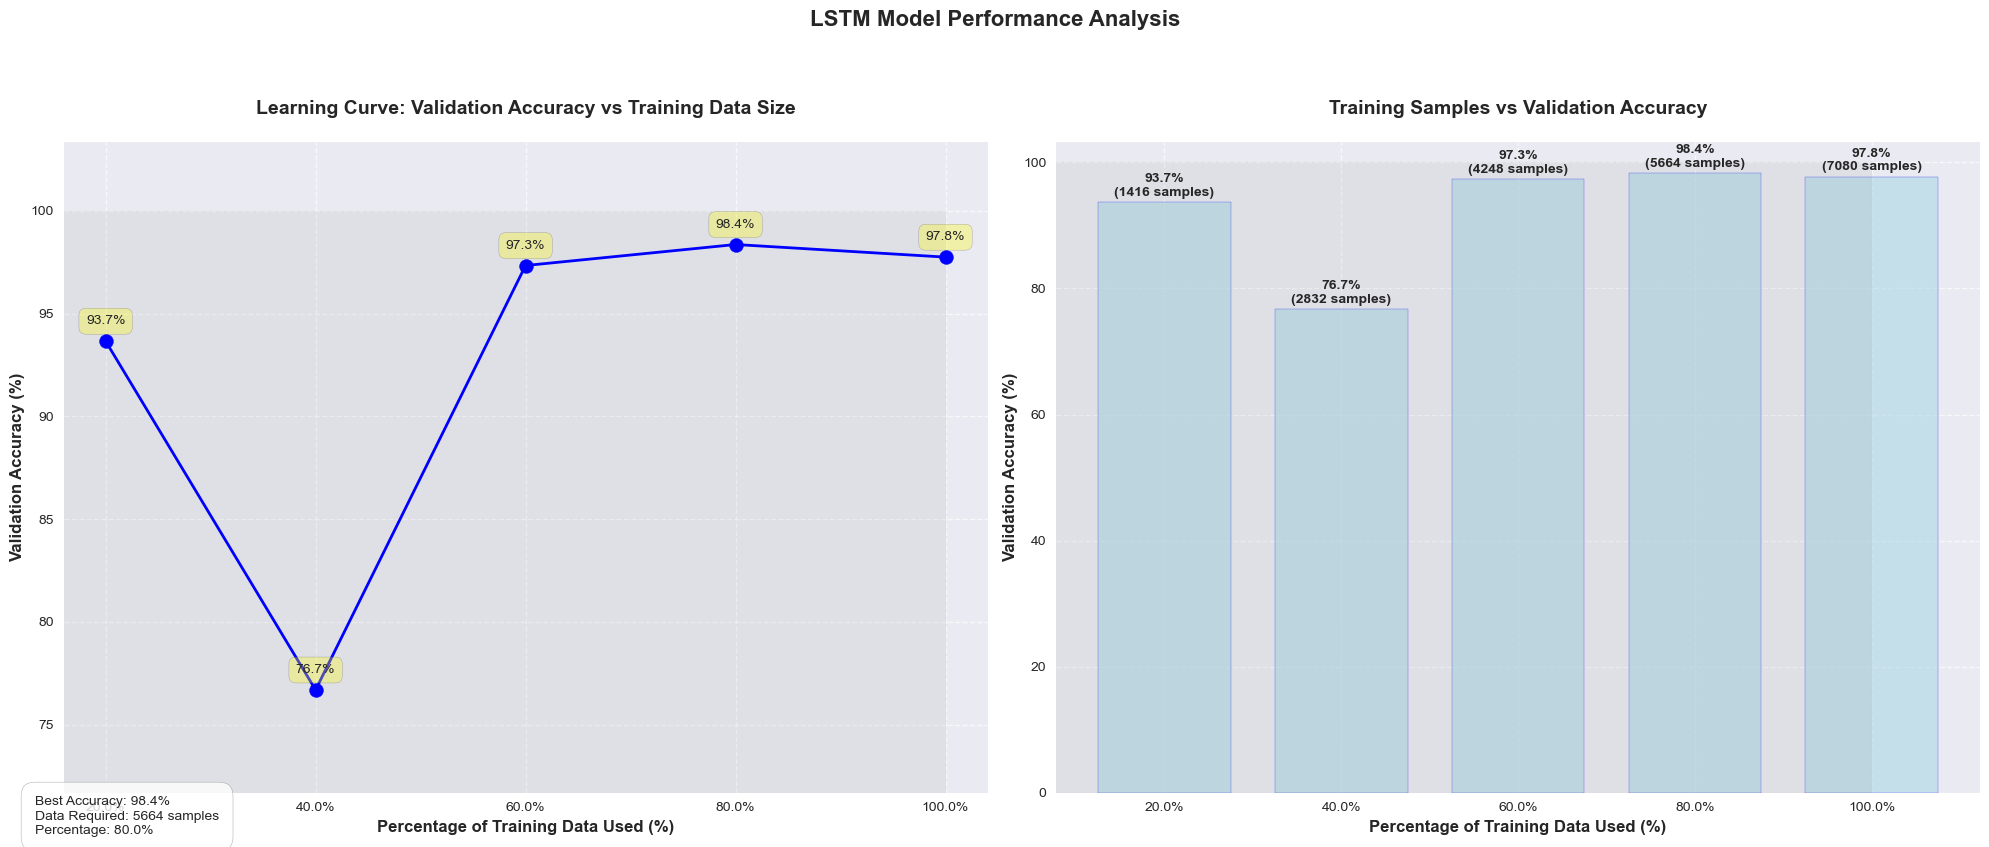


Detailed Performance Summary:
 Percentage  |    Training     |   Validation    |   Validation   
  of Data    |     Samples     |    Accuracy     |      Loss      
--------------------------------------------------------------------------------
    20.0%  |          1416  |         93.66%  |        0.1622
    40.0%  |          2832  |         76.69%  |        0.4866
    60.0%  |          4248  |         97.34%  |        0.0693
    80.0%  |          5664  |         98.36%  |        0.0656
   100.0%  |          7080  |         97.75%  |        0.0685

Results and visualizations have been saved.


In [10]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# [Previous training code remains the same until plotting]

# Set the style
plt.style.use('seaborn')
sns.set_palette("husl")

# Create figure and axis with larger size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Validation Accuracy
acc_line = ax1.plot(results['percentages'], 
                   [acc * 100 for acc in results['val_accuracy']], 
                   'b-', 
                   linewidth=2,
                   label='Validation Accuracy')

# Add points with annotations
for i, txt in enumerate(results['val_accuracy']):
    acc_percentage = txt * 100
    ax1.scatter(results['percentages'][i], acc_percentage, 
                color='blue', s=100, zorder=5)
    ax1.annotate(f'{acc_percentage:.1f}%', 
                 (results['percentages'][i], acc_percentage),
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', 
                          fc='yellow', 
                          alpha=0.3))

# Customize first plot
ax1.set_xlabel('Percentage of Training Data Used (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Validation Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Learning Curve: Validation Accuracy vs Training Data Size', 
              fontsize=14, 
              fontweight='bold', 
              pad=20)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(results['percentages'])
ax1.set_xticklabels([f'{x}%' for x in results['percentages']], fontsize=10)
ax1.set_ylim(min([acc * 100 for acc in results['val_accuracy']]) - 5, 
             max([acc * 100 for acc in results['val_accuracy']]) + 5)

# Add light background shading
ax1.add_patch(Rectangle((0, 0), 100, 100,
                       fill=True,
                       alpha=0.1,
                       color='gray'))

# Plot 2: Training Samples vs Accuracy
ax2.bar(results['percentages'], 
        [acc * 100 for acc in results['val_accuracy']],
        alpha=0.6,
        color='lightblue',
        edgecolor='blue',
        width=15)

# Add value labels on bars
for i, v in enumerate([acc * 100 for acc in results['val_accuracy']]):
    ax2.text(results['percentages'][i], v + 0.5, 
             f'{v:.1f}%\n({results["train_samples"][i]} samples)',
             ha='center', 
             va='bottom',
             fontsize=10,
             fontweight='bold')

# Customize second plot
ax2.set_xlabel('Percentage of Training Data Used (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Validation Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Training Samples vs Validation Accuracy', 
              fontsize=14, 
              fontweight='bold', 
              pad=20)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_xticks(results['percentages'])
ax2.set_xticklabels([f'{x}%' for x in results['percentages']], fontsize=10)

# Add light background shading
ax2.add_patch(Rectangle((0, 0), 100, 100,
                       fill=True,
                       alpha=0.1,
                       color='gray'))

# General styling
plt.suptitle('LSTM Model Performance Analysis', 
             fontsize=16, 
             fontweight='bold',
             y=1.05)

# Add a text box with summary statistics
stats_text = (f'Best Accuracy: {max(results["val_accuracy"])*100:.1f}%\n'
              f'Data Required: {results["train_samples"][np.argmax(results["val_accuracy"])]} samples\n'
              f'Percentage: {results["percentages"][np.argmax(results["val_accuracy"])]}%')
              
fig.text(0.02, 0.02, stats_text,
         fontsize=10,
         bbox=dict(facecolor='white', 
                  alpha=0.8, 
                  edgecolor='gray',
                  boxstyle='round,pad=1'))

plt.tight_layout()

# Save the plot with high DPI
plt.savefig('learning_curve_analysis.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')

plt.show()

# Print detailed summary table with formatting
print("\nDetailed Performance Summary:")
print("=" * 80)
print(f"{'Percentage':^12} | {'Training':^15} | {'Validation':^15} | {'Validation':^15}")
print(f"{'of Data':^12} | {'Samples':^15} | {'Accuracy':^15} | {'Loss':^15}")
print("-" * 80)
for i in range(len(results['percentages'])):
    print(f"{results['percentages'][i]:>8.1f}%  | "
          f"{results['train_samples'][i]:>13d}  | "
          f"{results['val_accuracy'][i]*100:>13.2f}%  | "
          f"{results['val_loss'][i]:>13.4f}")
print("=" * 80)

# Save results to a formatted JSON file
import json
with open('training_results.json', 'w') as f:
    json.dump({
        'experiment_summary': {
            'best_accuracy': f"{max(results['val_accuracy'])*100:.1f}%",
            'best_accuracy_samples': results['train_samples'][np.argmax(results['val_accuracy'])],
            'best_accuracy_percentage': f"{results['percentages'][np.argmax(results['val_accuracy'])]}%"
        },
        'detailed_results': {
            'percentages': results['percentages'],
            'train_samples': results['train_samples'],
            'val_accuracy': [float(acc) for acc in results['val_accuracy']],
            'val_loss': [float(loss) for loss in results['val_loss']]
        }
    }, f, indent=4)

print("\nResults and visualizations have been saved.")

In [11]:

print("\nTraining Results:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")
print("Best Hyperparameters:")
print(f"LSTM Units: {best_params['lstm_units']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Actual Epochs Trained: {best_params['epochs']}")
print(f"Stopped at Epoch: {best_params['stopped_epoch']}")


Training Results:
Best Validation Accuracy: 0.9816
Best Hyperparameters:
LSTM Units: 3
Batch Size: 32
Learning Rate: 0.001
Actual Epochs Trained: 30
Stopped at Epoch: 0


In [12]:
# Load test data
test_feat = np.load("datasets/test/test_feature.npz", allow_pickle=True)
test_feat_X = test_feat['features']

# Generate predictions
predictions = model.predict(test_feat_X)
predicted_classes = np.argmax(predictions, axis=1)

# Save predictions to text file
with open('pred_deepfeat.txt', 'w') as f:
    for pred in predicted_classes:
        f.write(f"{pred}\n")

# Print summary statistics
print("\nPredictions saved to pred_deepfeat.txt")
print(f"Total predictions generated: {len(predicted_classes)}")
print("\nFirst few predictions:")
print(predicted_classes[:10])

# Optional: Print prediction distribution
unique, counts = np.unique(predicted_classes, return_counts=True)
print("\nPrediction distribution:")
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} instances ({count/len(predicted_classes)*100:.2f}%)")

# Optional: Save prediction probabilities
prediction_probs = np.max(predictions, axis=1)
print("\nConfidence statistics:")
print(f"Mean confidence: {np.mean(prediction_probs):.4f}")
print(f"Min confidence: {np.min(prediction_probs):.4f}")
print(f"Max confidence: {np.max(prediction_probs):.4f}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Predictions saved to pred_deepfeat.txt
Total predictions generated: 2232

First few predictions:
[1 0 0 0 1 1 1 0 0 0]

Prediction distribution:
Label 0: 1222 instances (54.75%)
Label 1: 1010 instances (45.25%)

Confidence statistics:
Mean confidence: 0.9456
Min confidence: 0.5011
Max confidence: 0.9997
